In [ ]:
# Mounting the Google Colab Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Importing the aggregate_covid_country data set 
covid=pd.read_csv('/content/drive/My Drive/DS Datasets/aggregate_covid_country.csv')
covid

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [ ]:
# Check basics about covid dataset
print(covid.shape)

(23688, 5)


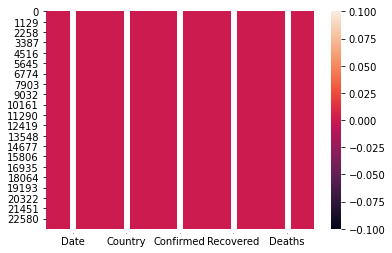

In [ ]:
#checking for the presence of values using heatmap
sns.heatmap(covid.isnull(), annot= True)
plt.show()

In [ ]:
#checking for null values for covid dataset
covid.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [ ]:
covid.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [ ]:
#Number of countries affected

print("Number of counties affected: ",len(covid["Country"].unique()))

Number of counties affected:  188


In [ ]:
#Converting "Date" into Datetime format
covid["Date"]=pd.to_datetime(covid["Date"])

#Number of confirmed cases in the world
print("Number of confirmed cases in the world: ",datewise["Confirmed"].iloc[-1])

Number of confirmed cases in the world:  5589626


In [ ]:
#Number of cases Recovered in the world
print("Number of cases Recovered in the world: ",datewise["Recovered"].iloc[-1])

Number of cases Recovered in the world:  2286956


In [ ]:
#Number of Death cases in the world
print("Number of Death cases in the world: ",datewise["Deaths"].iloc[-1])

Number of Death cases in the world:  350453


In [ ]:
#Number of Active cases in the world
print("#Number of Active cases in the world: ",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))

#Number of Active cases in the world:  2952217


In [ ]:
#Per Day confirmed Cases in the world
print("Number of confirmed cases per day in the world: ",np.round(datewise["Confirmed"].iloc[-1]/datewise.shape[0]))

Number of confirmed cases per day in the world:  44362.0


In [ ]:
#Per Day Recovered Cases in the world
print("Number of Recovered cases per day in the world: ",np.round(datewise["Recovered"].iloc[-1]/datewise.shape[0]))

Number of Recovered cases per day in the world:  18150.0


In [ ]:
#Per Day Death Count in the world
print("Number of Death per day in the world: ",np.round(datewise["Deaths"].iloc[-1]/datewise.shape[0]))

Number of Death per day in the world:  2781.0


In [ ]:
import plotly.express as px
fig=px.bar(x=datewise.index,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
fig.update_layout(title="Distribution of Number of Active Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()

In [ ]:
fig=px.bar(x=datewise.index,y=datewise["Recovered"]+datewise["Deaths"])
fig.update_layout(title="Distribution of Number of Closed Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases")
fig.show()

In [ ]:
#Calculating the Recovery Rate

datewise["Recovery Rate"]=(datewise["Recovered"]/datewise["Confirmed"])*100
datewise["Active Cases"]=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"]
datewise["Closed Cases"]=datewise["Recovered"]+datewise["Deaths"]

In [ ]:
print("Average Recovery Rate",datewise["Recovery Rate"].mean())
print("Median Recovery Rate",datewise["Recovery Rate"].median())

Average Recovery Rate 27.480793070635617
Median Recovery Rate 27.7636187930512


In [ ]:
#Data Analysis for India

india=covid[covid["Country"]=="India"]
datewise_india=india.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
print(datewise_india.iloc[-1])
print("Total Active Cases: ",datewise_india["Confirmed"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total Closed Cases: ",datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])

Confirmed    150793
Recovered     64277
Deaths         4344
Name: 2020-05-26 00:00:00, dtype: int64
Total Active Cases:  82172
Total Closed Cases:  68621


In [ ]:
fig=px.bar(x=datewise_india.index,y=datewise_india["Confirmed"]-datewise_india["Recovered"]-datewise_india["Deaths"])
fig.update_layout(title="Distribution of Number of Active Cases in India",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()